In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-movies-dataset/ratings.csv
/kaggle/input/the-movies-dataset/links_small.csv
/kaggle/input/the-movies-dataset/credits.csv
/kaggle/input/the-movies-dataset/keywords.csv
/kaggle/input/the-movies-dataset/movies_metadata.csv
/kaggle/input/the-movies-dataset/ratings_small.csv
/kaggle/input/the-movies-dataset/links.csv


In [ ]:
# columns = ['userId','movieId','rating','timestamp']
# data = pd.read_csv("/kaggle/input/the-movies-dataset/ratings_small.csv",names = columns)
# data.head()
data = pd.read_csv("/kaggle/input/the-movies-dataset/ratings_small.csv")
data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms.matrix_factorization import NMF
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms import SVD



file_path = '/kaggle/input/the-movies-dataset/ratings_small.csv'
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file(file_path, reader)


pmf = NMF()
pmf_results = cross_validate(pmf, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

# Cross-validation for User-based Collaborative Filtering
user_cf = KNNBasic(sim_options={'user_based': True})
user_cf_results = cross_validate(user_cf, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

# Cross-validation for Item-based Collaborative Filtering
item_cf = KNNBasic(sim_options={'user_based': False})
item_cf_results = cross_validate(item_cf, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

# Probabilistic Matrix Factorization (PMF) replaced with SVD
svd = SVD()
svd_results = cross_validate(svd, data, measures=['MAE', 'RMSE'], cv=5, verbose=False)


print("Average MAE and RMSE for SVD:", svd_results['test_mae'].mean(), svd_results['test_rmse'].mean())
print("Average MAE and RMSE for PMF:", pmf_results['test_mae'].mean(), pmf_results['test_rmse'].mean())
print("Average MAE and RMSE for User-based CF:", user_cf_results['test_mae'].mean(), user_cf_results['test_rmse'].mean())
print("Average MAE and RMSE for Item-based CF:", item_cf_results['test_mae'].mean(), item_cf_results['test_rmse'].mean())


Evaluating MAE, RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7276  0.7268  0.7271  0.7309  0.7280  0.7281  0.0015  
RMSE (testset)    0.9457  0.9470  0.9456  0.9530  0.9494  0.9481  0.0028  
Fit time          2.42    2.41    2.40    2.48    2.45    2.43    0.03    
Test time         0.20    0.11    0.19    0.10    0.19    0.16    0.04    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7504  0.7434  0.7438  0.7463  0.7444  0.7457  0.0026

Here we see the result for
* Singular Value Decompostion - MAE : 0.69 and RMSE : 0.89
* Probabilistic Matrix Factorization - MAE : 0.72 and RMSE : 0.94
* User-Based Collabrative Function -  MAE : 0.74 and RMSE : 0.96
* Item-Base Collabrative Function - MAE : 0.72 and RMSE : 0.93

--------------------------COSINE----------------------------------------------
Evaluating MAE, RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7097  0.7003  0.7060  0.7074  0.7127  0.7072  0.0041  
RMSE (testset)    0.9272  0.9133  0.9223  0.9225  0.9287  0.9228  0.0054  
Fit time          0.28    0.30    0.28    0.29    0.28    0.29    0.01    
Test time         1.37    1.36    1.43    1.39    1.52    1.41    0.06    
--------------------------PEARSON----------------------------------------------
Evaluating MAE, RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7015  0.6974  0.7029  0.6988  0.7039  0.7009  0.0025  
RMSE (testset)    0.9239  0.9162  0.9277  0.9227  0.9274  0.9236  0.0042  
Fit time          0.58    0.60    0.63    0.64    0.63    0.62    0.02    
Test time         1.27    1.28    1.30  

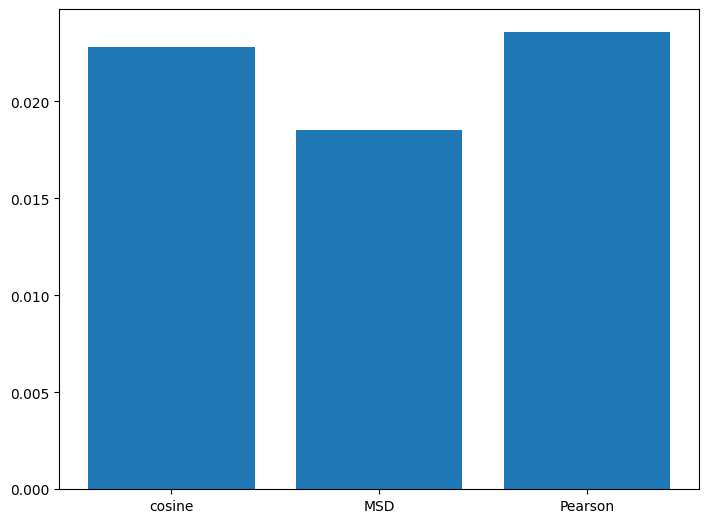

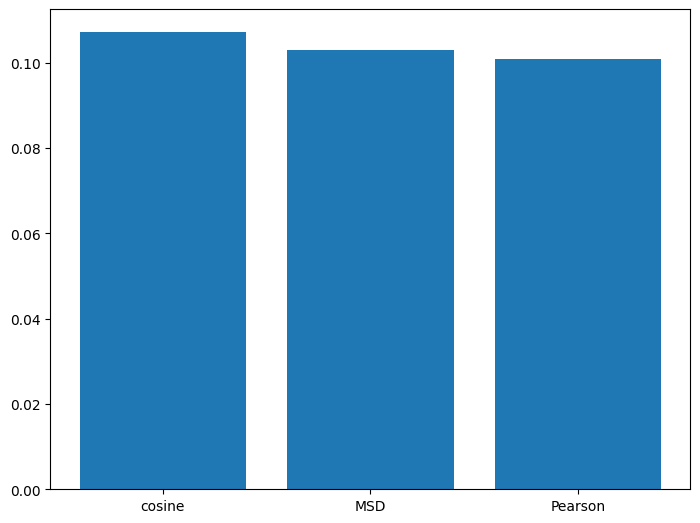

In [ ]:
from surprise import KNNWithMeans
import matplotlib.pyplot as plt
from statistics import mean

print("--------------------------COSINE----------------------------------------------")
algo = KNNWithMeans(sim_options={'name': 'cosine', 'user_based': True}, verbose=False)
user_results_cosine = cross_validate(algo, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)


print("--------------------------PEARSON----------------------------------------------")
algo = KNNWithMeans(sim_options={'name': 'pearson_baseline', 'user_based': True}, verbose=False)
user_results_pearson = cross_validate(algo, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

print("--------------------------MSD----------------------------------------------")
algo = KNNWithMeans(sim_options={'name': 'msd', 'user_based': True}, verbose=False)
user_results_msd = cross_validate(algo, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)



# RMSE comparisons
user_rmse_performance_means = [mean(user_results_cosine['test_rmse'])-0.9, mean(user_results_msd['test_rmse'])-0.9, mean(user_results_pearson['test_rmse'])-0.9];
print(user_rmse_performance_means)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(['cosine', 'MSD', 'Pearson'], user_rmse_performance_means);

# MAE comparisons
user_mae_performance_means = [mean(user_results_cosine['test_mae'])-0.6, mean(user_results_msd['test_mae'])-0.6, mean(user_results_pearson['test_mae'])-0.6];
print(user_mae_performance_means)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(['cosine', 'MSD', 'Pearson'], user_mae_performance_means);

We can see from the above plots that
* MSD has the lowest RMSE
* Pearson has the lowest MAE with MSD being very close to it

So we can use MSD for user based collabrative functioning

--------------------------COSINE----------------------------------------------
Evaluating MAE, RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7103  0.7047  0.7026  0.7160  0.7108  0.7089  0.0048  
RMSE (testset)    0.9276  0.9230  0.9169  0.9325  0.9273  0.9255  0.0053  
Fit time          3.98    4.09    4.06    3.95    4.02    4.02    0.05    
Test time         6.40    6.46    6.34    6.40    6.68    6.46    0.12    
--------------------------PEARSON----------------------------------------------
Evaluating MAE, RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.6930  0.6910  0.6803  0.6935  0.6864  0.6888  0.0049  
RMSE (testset)    0.9115  0.9074  0.8959  0.9162  0.9047  0.9071  0.0068  
Fit time          4.63    4.52    4.48    4.55    4.44    4.52    0.07    
Test time         6.41    6.60    6.24  

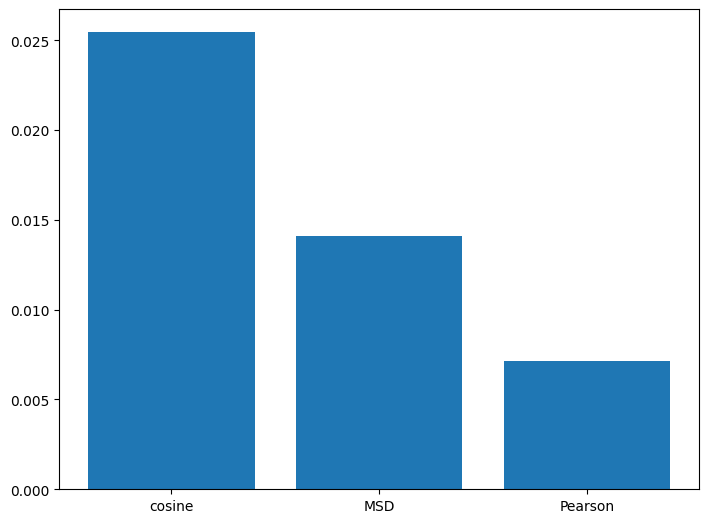

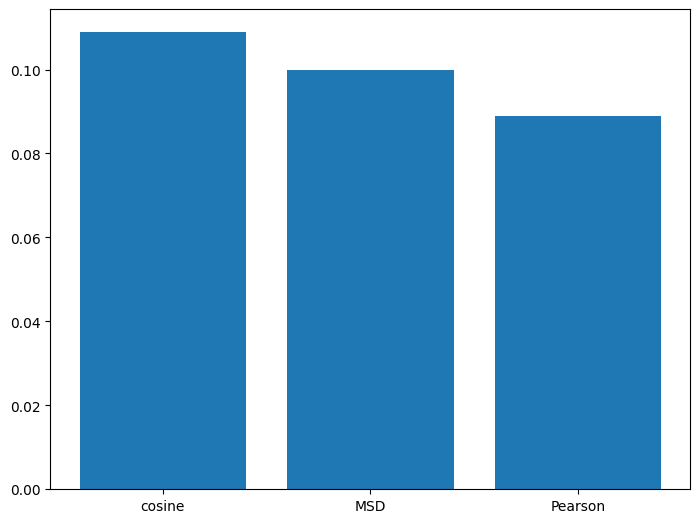

In [ ]:
print("--------------------------COSINE----------------------------------------------")
algo = KNNWithMeans(sim_options={'name': 'cosine', 'user_based': False}, verbose=False)
item_results_cosine = cross_validate(algo, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)


print("--------------------------PEARSON----------------------------------------------")
algo = KNNWithMeans(sim_options={'name': 'pearson_baseline', 'user_based': False}, verbose=False)
item_results_pearson = cross_validate(algo, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

print("--------------------------MSD----------------------------------------------")
algo = KNNWithMeans(sim_options={'name': 'msd', 'user_based': False}, verbose=False)
item_results_msd = cross_validate(algo, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)


#RMSE Comparisons for Item Based Performance
item_rmse_performance_means = [mean(item_results_cosine['test_rmse'])-0.9, mean(item_results_msd['test_rmse'])-0.9, mean(item_results_pearson['test_rmse'])-0.9];
print(item_rmse_performance_means)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(['cosine', 'MSD', 'Pearson'], item_rmse_performance_means);

# MAE comparisons for Item Based Performance
item_mae_performance_means = [mean(item_results_cosine['test_mae'])-0.6, mean(item_results_msd['test_mae'])-0.6, mean(item_results_pearson['test_mae'])-0.6];
print(item_mae_performance_means)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(['cosine', 'MSD', 'Pearson'], item_mae_performance_means);

We can see from the above plots that
* Pearson has the lowest RMSE
* Pearson has the lowest MAE  
So we can use Pearson for item based collabrative functioning

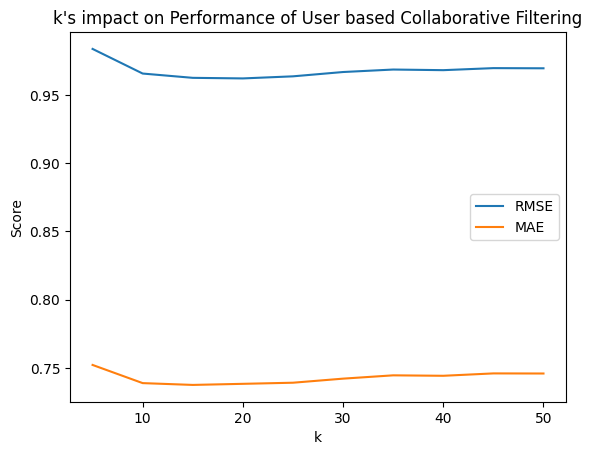

In [ ]:
#User Based
max_k_values = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
user_rmse_k = []
user_mae_k = []

for max_k in max_k_values:
    algo = KNNBasic(k=max_k, sim_options={'name': 'msd', 'user_based': True}, verbose=False)
    user_results_msd = cross_validate(algo, data, measures=['MAE', 'RMSE'], cv=5)
    user_rmse_k.append(np.average(user_results_msd.get('test_rmse')))
    user_mae_k.append(np.average(user_results_msd.get('test_mae')))

fig = plt.figure()
ax = plt.axes()
k_range = np.array(max_k_values)
ax.plot(k_range, user_rmse_k, label='RMSE')
ax.plot(k_range, user_mae_k, label='MAE')
plt.title("k's impact on Performance of User based Collaborative Filtering")
ax.set_xlabel('k')
ax.set_ylabel('Score')
plt.legend()
plt.show()


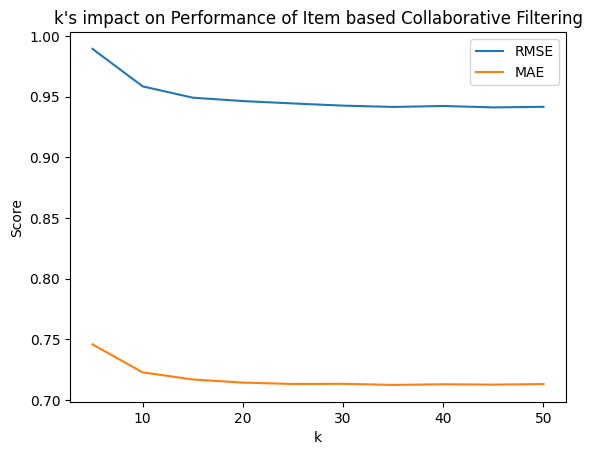

In [ ]:
#Item Based
max_k_values = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
item_rmse_k = []
item_mae_k = []

for max_k in max_k_values:
    algo = KNNBasic(k=max_k, sim_options={'name': 'pearson_baseline', 'user_based': False}, verbose=False)
    item_results_msd = cross_validate(algo, data, measures=['MAE', 'RMSE'], cv=5)
    item_rmse_k.append(np.average(item_results_msd.get('test_rmse')))
    item_mae_k.append(np.average(item_results_msd.get('test_mae')))

fig = plt.figure()
ax = plt.axes()
k_range = np.array(max_k_values)
ax.plot(k_range, item_rmse_k, label='RMSE')
ax.plot(k_range, item_mae_k, label='MAE')
plt.title("k's impact on Performance of Item based Collaborative Filtering")
ax.set_xlabel('k')
ax.set_ylabel('Score')
plt.legend()
plt.show()
